In [ ]:

import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt


In [ ]:
nifty_df9 = pd.read_csv('/content/drive/MyDrive/MTH443 Project/NIFTY 50-24-03-2015-to-15-03-2016.csv')
nifty_df1 = pd.read_csv('/content/drive/MyDrive/MTH443 Project/NIFTY 50-16-03-2016-to-16-03-2017.csv')
nifty_df2 = pd.read_csv('/content/drive/MyDrive/MTH443 Project/NIFTY 50-17-03-2017-to-17-03-2018.csv')
nifty_df3 = pd.read_csv('/content/drive/MyDrive/MTH443 Project/NIFTY 50-18-03-2018-to-18-03-2019.csv')
nifty_df4 = pd.read_csv('/content/drive/MyDrive/MTH443 Project/NIFTY 50-19-03-2019-to-19-03-2020.csv')
nifty_df5 = pd.read_csv('/content/drive/MyDrive/MTH443 Project/NIFTY 50-20-03-2020-to-20-03-2021.csv')
nifty_df6 = pd.read_csv('/content/drive/MyDrive/MTH443 Project/NIFTY 50-21-03-2021-to-21-03-2022.csv')
nifty_df7 = pd.read_csv('/content/drive/MyDrive/MTH443 Project/NIFTY 50-22-03-2022-to-22-03-2023.csv')
nifty_df8 = pd.read_csv('/content/drive/MyDrive/MTH443 Project/NIFTY 50-23-03-2023-to-23-03-2024.csv')
nifty_df10 = pd.read_csv('/content/drive/MyDrive/MTH443 Project/NIFTY 50-24-03-2024-to-24-03-2025.csv')


In [ ]:
data = pd.concat([nifty_df9,nifty_df1,nifty_df2,nifty_df3,nifty_df4,nifty_df5,nifty_df6,nifty_df7,nifty_df8,nifty_df10], axis=0, ignore_index=True)

In [ ]:
data=data[:-1]

In [ ]:
data.tail()

,Date,Open,High,Low,Close,Shares Traded,Turnover (₹ Cr)
2473,17-MAR-2025,22353.15,22577.0,22353.15,22508.75,251102239.0,24122.27
2474,18-MAR-2025,22662.25,22857.8,22599.20,22834.30,272578844.0,26387.47
2475,19-MAR-2025,22874.95,22940.7,22807.95,22907.60,323992121.0,26994.95
2476,20-MAR-2025,23036.60,23216.7,22973.95,23190.65,313729818.0,27573.99
2477,21-MAR-2025,23168.25,23402.7,23132.80,23350.40,540966316.0,51005.67


In [ ]:
data.columns

Index(['Date ', 'Open ', 'High ', 'Low ', 'Close ', 'Shares Traded ',
       'Turnover (₹ Cr)'],
      dtype='object')

In [ ]:
# Clean column names (remove any trailing spaces)
data.columns = data.columns.str.strip()


In [ ]:
high = data['High']
low = data['Low']
close = data['Close']
open = data['Open']


In [ ]:
high

,High
0,8627.75
1,8573.75
2,8499.45
3,8413.20
4,8504.55
...,...
2473,22577.00
2474,22857.80
2475,22940.70
2476,23216.70


In [ ]:
data = data.drop(columns=['Date '])


KeyError: "['Date '] not found in axis"

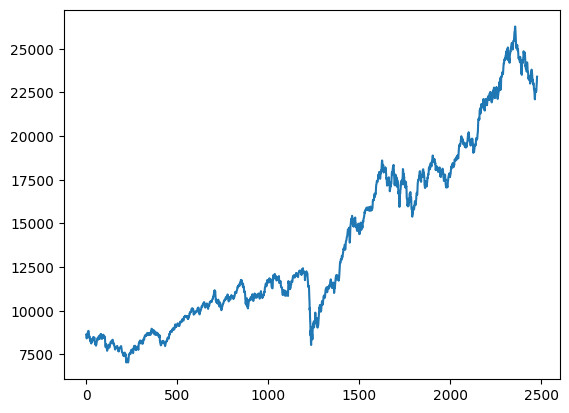

In [ ]:
plt.plot(high)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [ ]:
returns = high.pct_change().dropna()*100


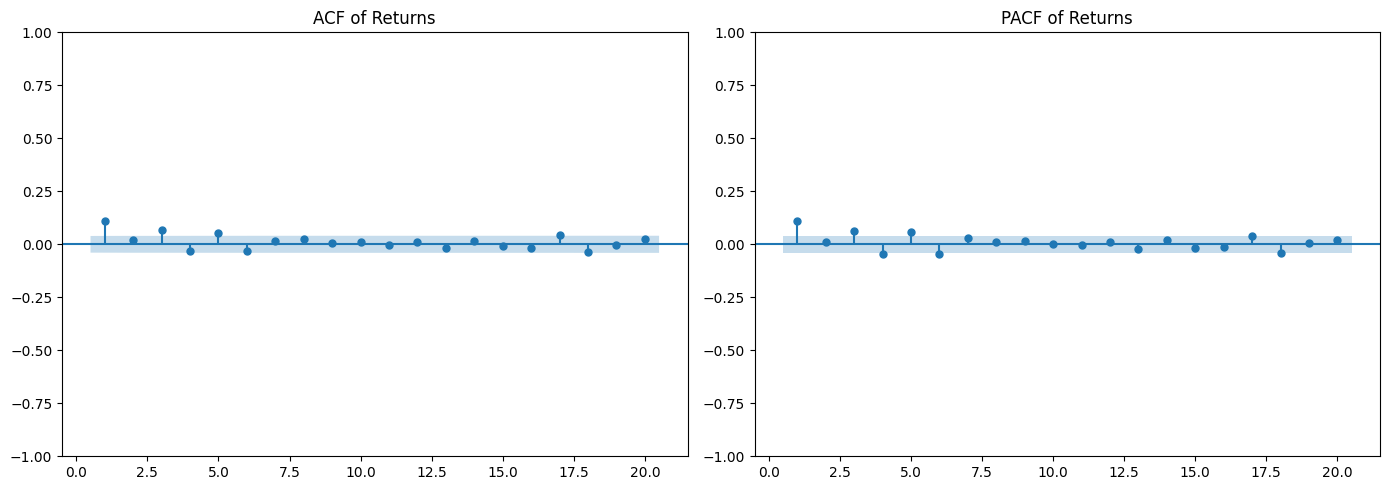

In [ ]:
# Plot ACF and PACF side by side
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# ACF
plot_acf(returns, lags=20, ax=ax[0], zero=False)
ax[0].set_title('ACF of Returns')

# PACF
plot_pacf(returns, lags=20, ax=ax[1], method='ywm', zero=False)
ax[1].set_title('PACF of Returns')

plt.tight_layout()
plt.show()

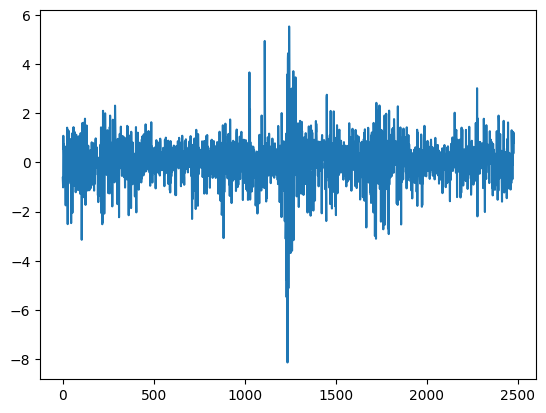

In [ ]:
plt.plot(returns)

In [ ]:
!pip install arch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 985.3/985.3 kB 24.6 MB/s eta 0:00:00


In [ ]:
from arch import arch_model

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                   High   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -2793.46
Distribution:                  Normal   AIC:                           5598.92
Method:            Maximum Likelihood   BIC:                           5633.81
                                        No. Observations:                 2476
Date:                Sun, Apr 06 2025   Df Residuals:                     2475
Time:                        15:14:55   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0680  1.579e-02      4.306  1.662e-05 [3.

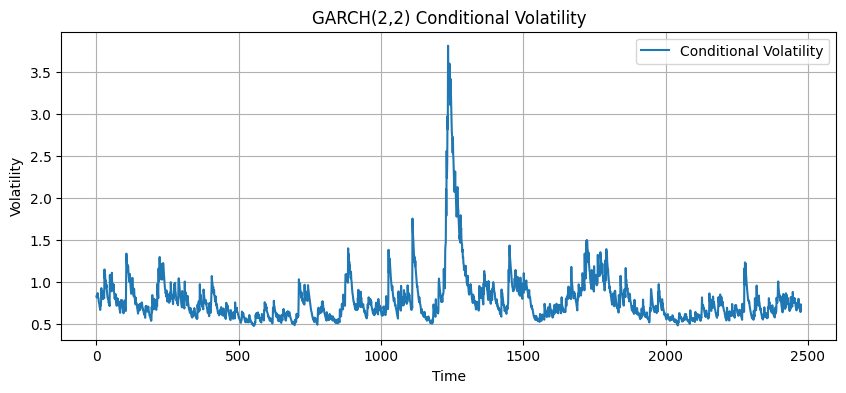

In [ ]:
# Fit GARCH(2,2)
model = arch_model(returns, vol='Garch', p=2, q=2)
garch_fit = model.fit(disp='off')

# Print the summary
print(garch_fit.summary())

# Plot the volatility (conditional standard deviation)
plt.figure(figsize=(10, 4))
plt.plot(garch_fit.conditional_volatility, label='Conditional Volatility')
plt.title('GARCH(2,2) Conditional Volatility')
plt.xlabel('Time')
plt.ylabel('Volatility')
plt.legend()
plt.grid(True)
plt.show()


We can see that the p values are not less than 0.05 so we will move to garch(1,1) as the pacf at lag1 is also close to zero

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                   High   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -2796.71
Distribution:                  Normal   AIC:                           5601.42
Method:            Maximum Likelihood   BIC:                           5624.68
                                        No. Observations:                 2477
Date:                Wed, Apr 23 2025   Df Residuals:                     2476
Time:                        08:20:55   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0685  1.545e-02      4.432  9.328e-06 [3.

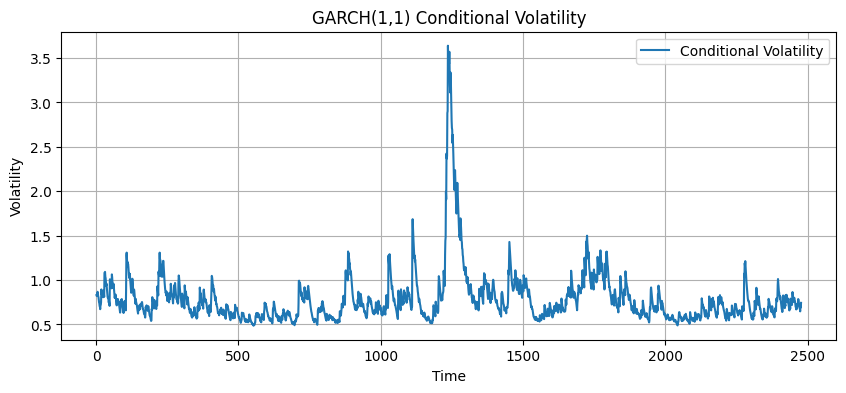

In [ ]:
# Fit GARCH(1,1)
model = arch_model(returns, vol='Garch', p=1, q=1)
garch_fit = model.fit(disp='off')

# Print the summary
print(garch_fit.summary())

# Plot the volatility (conditional standard deviation)
plt.figure(figsize=(10, 4))
plt.plot(garch_fit.conditional_volatility, label='Conditional Volatility')
plt.title('GARCH(1,1) Conditional Volatility')
plt.xlabel('Time')
plt.ylabel('Volatility')
plt.legend()
plt.grid(True)
plt.show()


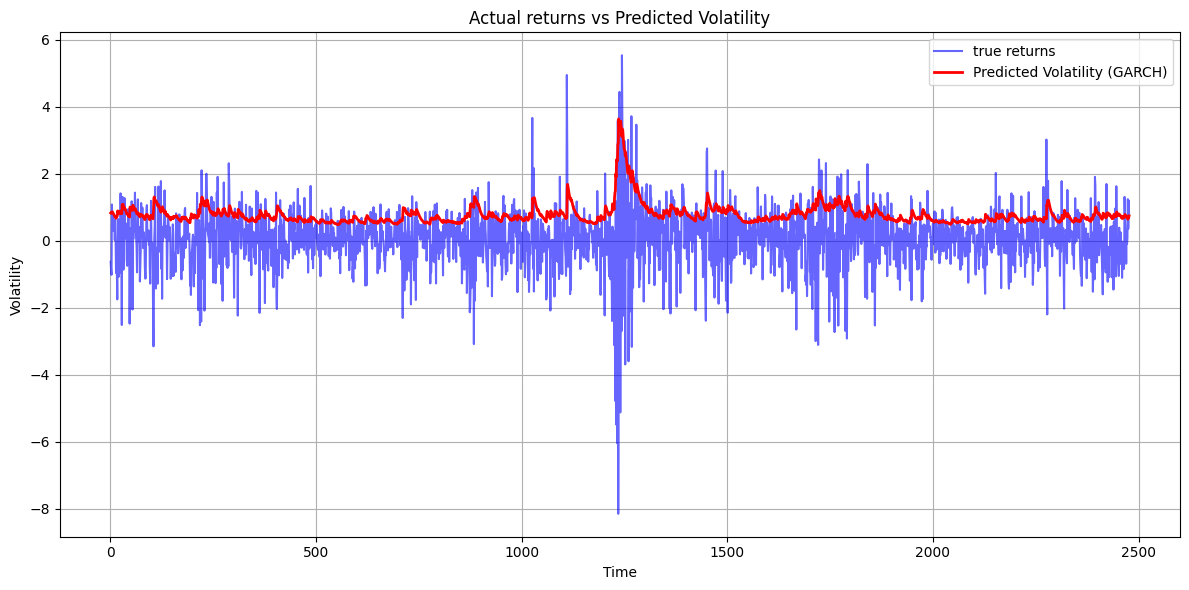

In [ ]:
# Get predicted volatility
predicted_volatility = garch_fit.conditional_volatility

# actual returns
actual_returns = returns

# Plot
plt.figure(figsize=(12, 6))
plt.plot(actual_returns, label='true returns', color='blue', alpha=0.6)
plt.plot(predicted_volatility, label='Predicted Volatility (GARCH)', color='red', linewidth=2)
plt.title('Actual returns vs Predicted Volatility')
plt.xlabel('Time')
plt.ylabel('Volatility')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
from datetime import datetime, timedelta

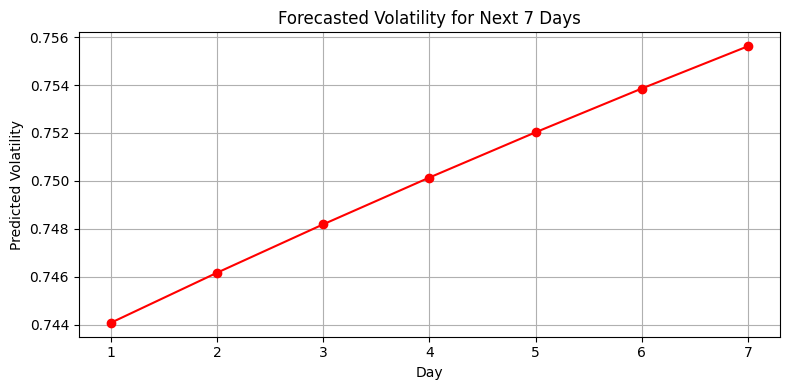

In [ ]:
# Forecast next 7 days of volatility
forecast_horizon = 7
forecast = garch_fit.forecast(horizon=forecast_horizon)

# Extract the variance forecast (convert to standard deviation)
predicted_volatility = forecast.variance.values[-1] ** 0.5  # last row, 7 values

# Plot forecast
plt.figure(figsize=(8, 4))
plt.plot(range(1, forecast_horizon + 1), predicted_volatility, marker='o', color='red')
plt.title('Forecasted Volatility for Next 7 Days')
plt.xlabel('Day')
plt.ylabel('Predicted Volatility')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Residual analysis
resid = garch_fit.resid / garch_fit.conditional_volatility


In [ ]:
print(garch_fit.summary())

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                   High   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -2796.71
Distribution:                  Normal   AIC:                           5601.42
Method:            Maximum Likelihood   BIC:                           5624.68
                                        No. Observations:                 2477
Date:                Wed, Apr 23 2025   Df Residuals:                     2476
Time:                        08:20:55   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0685  1.545e-02      4.432  9.328e-06 [3.

In [ ]:
resid = garch_fit.resid / garch_fit.conditional_volatility

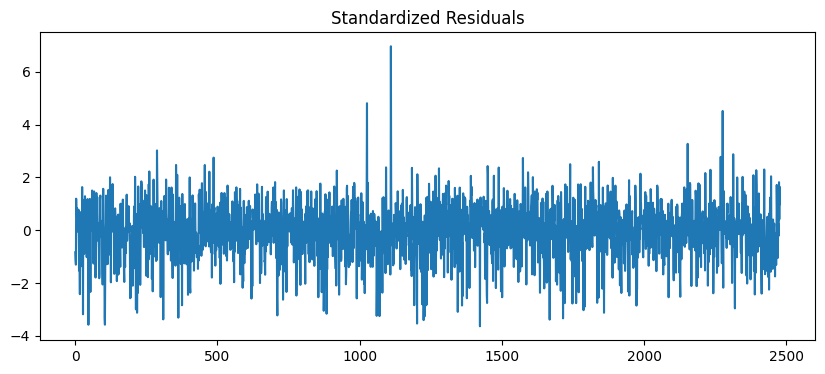

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(resid)
plt.title("Standardized Residuals")
plt.show()

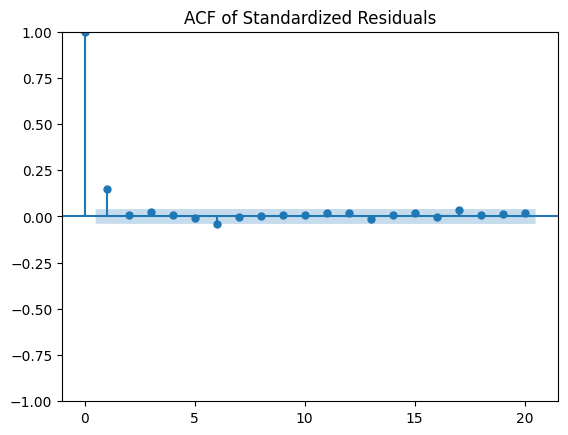

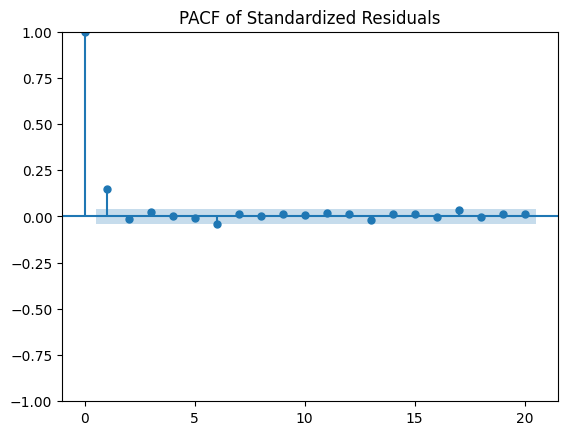

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(resid, lags=20)
plt.title("ACF of Standardized Residuals")
plt.show()

plot_pacf(resid, lags=20)
plt.title("PACF of Standardized Residuals")
plt.show()

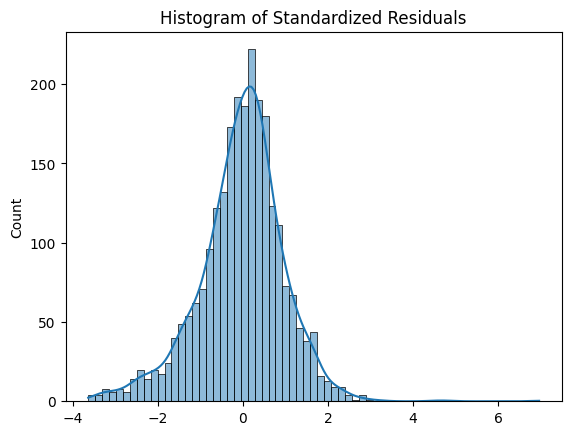

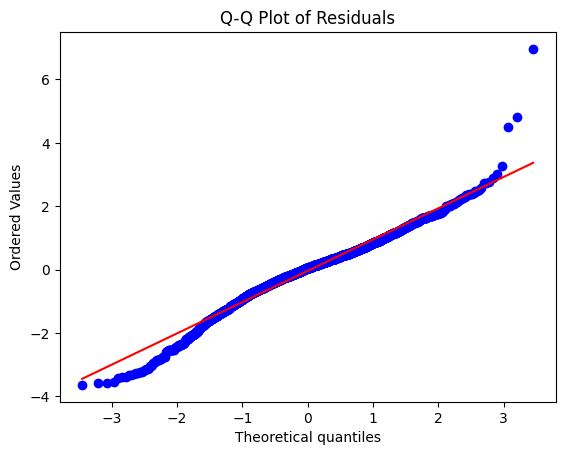

In [ ]:
import seaborn as sns
import scipy.stats as stats

sns.histplot(resid, kde=True)
plt.title("Histogram of Standardized Residuals")
plt.show()

# Q-Q plot
stats.probplot(resid, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.show()

In [ ]:
from statsmodels.stats.diagnostic import acorr_ljungbox

lb_test = acorr_ljungbox(resid, lags=[10], return_df=True)
print(lb_test)

     lb_stat     lb_pvalue
10  61.30127  2.054106e-09


In [ ]:
from sklearn.metrics import mean_squared_error

# 1. True "volatility" proxy = squared returns
true_volatility = returns ** 2

# 2. GARCH predicted variance (volatility^2)
garch_predicted_variance = garch_fit.conditional_volatility ** 2

# 3. Align lengths (just in case)
min_len = min(len(true_volatility), len(garch_predicted_variance))
true_volatility = true_volatility[-min_len:]
garch_predicted_variance = garch_predicted_variance[-min_len:]

# 4. Calculate MSE
mse_garch = mean_squared_error(true_volatility, garch_predicted_variance)
print(f"GARCH MSE: {mse_garch:.4f}")


GARCH MSE: 4.3805


In [ ]:
import numpy as np

# Avoid division by zero by adding a small epsilon
epsilon = 1e-8
mape_garch = np.mean(np.abs((true_volatility - garch_predicted_variance) / (true_volatility + epsilon))) * 100

print(f"GARCH MAPE: {mape_garch:.2f}%")


GARCH MAPE: 3520497.81%


In [ ]:

# Sample price data (replace this with your own)
# prices = pd.Series(...)  # Example: prices = df['Close']

# Step 1: Compute percentage returns
returns = 100 * prices.pct_change().dropna()

# Step 2: Fit GARCH(1,1)
model = arch_model(returns, vol='Garch', p=1, q=1)
res = model.fit(disp='off')


TypeError: unsupported operand type(s) for +: 'int' and 'Timedelta'

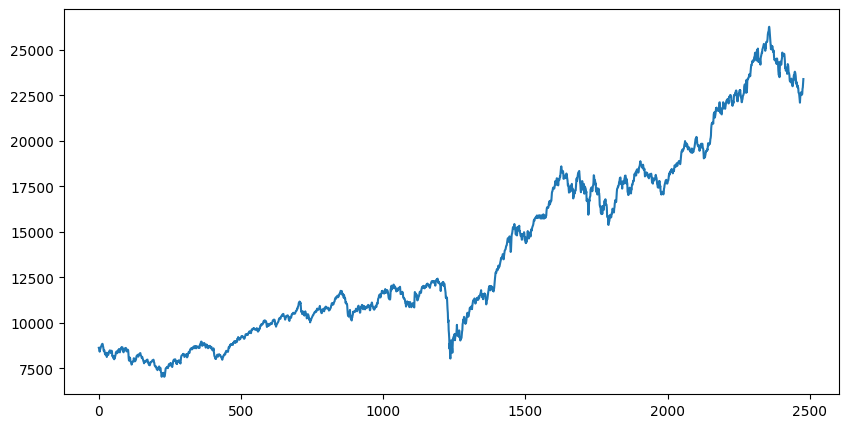

In [ ]:
# Step 3: Forecast next return (1-step ahead)
forecast = garch_fit.forecast(horizon=1)
predicted_return_pct = forecast.mean.iloc[-1, 0]  # in %
predicted_return = predicted_return_pct / 100     # convert to decimal

# Step 4: Convert to price
last_price = high.iloc[-1]
predicted_price = last_price * (1 + predicted_return)

# Step 5: Plot
plt.figure(figsize=(10,5))
plt.plot(high, label='Actual Prices')
plt.scatter(high.index[-1] + pd.Timedelta(days=1), predicted_price,
            color='red', label='Predicted Next Price')
plt.legend()
plt.title('Actual vs Predicted Next Price (GARCH)')
plt.show()


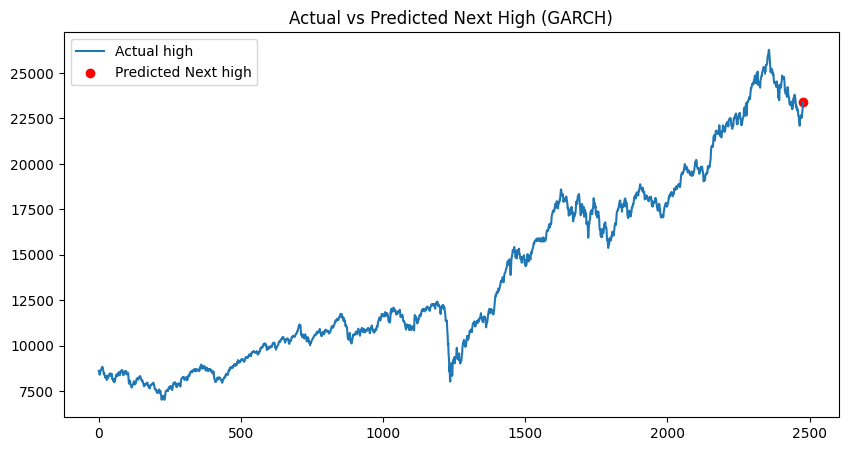

In [ ]:
# Get the next index value
next_index = high.index[-1] + 1

# Plot
plt.figure(figsize=(10,5))
plt.plot(high, label='Actual high')
plt.scatter(next_index, predicted_price, color='red', label='Predicted Next high')
plt.legend()
plt.title('Actual vs Predicted Next High (GARCH)')
plt.show()


In [ ]:
len(returns)

2477

In [ ]:
len(high)

2478

In [ ]:
# Step 3: Forecast next return for each point using the already fitted model
predicted_prices = []

# Use the fitted garch_fit model to forecast for each point
for t in range(len(returns)):
    forecast = garch_fit.forecast(horizon=1, start=t)
    predicted_return_pct = forecast.mean.iloc[t, 0]  # in percentage
    predicted_return = predicted_return_pct / 100  # convert to decimal

    # Convert the predicted return back to the price (using the previous high value)
    if t == 0:
        predicted_price = high.iloc[0] * (1 + predicted_return)  # first prediction uses the first high value
    else:
        predicted_price = predicted_prices[-1] * (1 + predicted_return)

    # Append predicted price
    predicted_prices.append(predicted_price)

# Step 4: Plot actual vs predicted high prices
plt.figure(figsize=(10,5))
plt.plot(high, label='Actual High Prices')
plt.plot(high.index[1:], predicted_prices[1:], label='Predicted High Prices (Using Fitted GARCH)', linestyle='--')
plt.legend()
plt.title('Actual vs Predicted High Prices using GARCH Model')
plt.show()


IndexError: index 1239 is out of bounds for axis 0 with size 1238